In [1]:
# This script demonstrates the capabilities of cluster_slug by using
# it to re-analyze the M31 star clusters catalog of Johnson et al. (2015, ApJ)

# Import the libraries we'll need
from astropy.io import ascii
from astropy.io import fits
import emcee
from astropy import table
from astropy.table import unique, Table, hstack, Column
import sys
from numpy import inf
import numpy as np
import numpy.ma as ma
import time
from matplotlib.pyplot import figure as fig
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import norm
from slugpy.cluster_slug import cluster_slug
from slugpy import * 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

In [2]:
#Imported AP fits files which include best fit of mass and age data already 

apdata = Table.read('apdata-cluster_6phot+agemass.fits')
print("Reading AP Cluster Data (Phot+Agemasss)...")
apdata_12clusters = Table.read('apdata-cluster_6phot+agemass_select.fits')
print("Reading AP 12 Cluster Data (Phot+AgeMass)...")

apdata_good_phot6filts=Table.read('/Volumes/My_Passport_for_Mac/M33_M31_LGCS_Files/M31-Andromeda/Photometery_Tables/apdata_goodphot_6filts.fits')


LEGUS_PHAT_PadKroupa_prop=Table.read('LEGUS_1e6_1e10age_PadKroupaAfter_PHAT_lib_1e7Trials_cluster_prop.fits')
LEGUS_PHAT_PadKroupa_phot=Table.read('LEGUS_1e6_1e10age_PadKroupaAfter_PHAT_lib_1e7Trials_cluster_phot.fits')

dmod_M31=24.47 

Reading AP Cluster Data (Phot+Agemasss)...
Reading AP 12 Cluster Data (Phot+AgeMass)...


In [3]:
diff_PDFMedian_m_apdata6filt=Table.read('diff_PDFMedian_m_apdata6filt.fits')
diff_PDFMedian_t_apdata6filt=Table.read('diff_PDFMedian_t_apdata6filt.fits')
diff_PDFMedian_x_apdata6filt=Table.read('diff_PDFMedian_x_apdata6filt.fits')

In [4]:
#Extract photometry from the AP PHAT catalog and pack it into arrays
cluster_id5 = np.array(apdata_good_phot6filts['ID'])

#F275W filter with error
#apdata_good_phot6filts['MAG275'][apdata_good_phot6filts['MAG275'] == 'INDEF'] = -99
#m275 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG275'], dtype='float64'), -99) - dmod_M31
#apdata_good_phot6filts['SIG275'][apdata_good_phot6filts['SIG275'] == 'INDEF'] = -99
#m275err = ma.masked_equal(np.array(apdata_good_phot6filts['SIG275'], 
#                                   dtype='float64'), -99)

#F336W filter with error
apdata_good_phot6filts['MAG336'][apdata_good_phot6filts['MAG336'] == 'INDEF'] = -99
m336_5 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG336'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG336'][apdata_good_phot6filts['SIG336'] == 'INDEF'] = -99
m336err_5 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG336'], 
                                   dtype='float64'), -99)

#F475W filter with error
apdata_good_phot6filts['MAG475'][apdata_good_phot6filts['MAG475'] == 'INDEF'] = -99
m475_5 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG475'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG475'][apdata_good_phot6filts['SIG475'] == 'INDEF'] = -99
m475err_5 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG475'],
                                   dtype='float64'), -99)
#F814W filter with error
apdata_good_phot6filts['MAG814'][apdata_good_phot6filts['MAG814'] == 'INDEF'] = -99
m814_5 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG814'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG814'][apdata_good_phot6filts['SIG814'] == 'INDEF'] = -99
m814err_5 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG814'],
                                   dtype='float64'), -99)

#F110W filter with error
apdata_good_phot6filts['MAG110'][apdata_good_phot6filts['MAG110'] == 'INDEF'] = -99
m110_5 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG110'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG110'][apdata_good_phot6filts['SIG110'] == 'INDEF'] = -99
m110err_5 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG110'],
                                   dtype='float64'), -99)

#F160W filter with error 
apdata_good_phot6filts['MAG160'][apdata_good_phot6filts['MAG160'] == 'INDEF'] = -99
m160_5 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG160'],dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG160'][apdata_good_phot6filts['SIG160'] == 'INDEF'] = -99
m160err_5 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG160'],
                                   dtype='float64'), -99)

apdata_good_phot6filts_logm5=apdata_good_phot6filts['BEST_MASS']
apdata_good_phot6filts_logt5=apdata_good_phot6filts['BEST_AGE']
apdata_good_phot6filts_logx5=apdata_good_phot6filts['CMD_AV_BEST']

/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:965: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return getattr(self.data, op)(other)


In [5]:
#Extract photometry from the AP PHAT catalog and pack it into arrays
cluster_id6 = np.array(apdata_good_phot6filts['ID'])

#F275W filter with error
apdata_good_phot6filts['MAG275'][apdata_good_phot6filts['MAG275'] == 'INDEF'] = -99
m275_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG275'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG275'][apdata_good_phot6filts['SIG275'] == 'INDEF'] = -99
m275err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG275'], 
                                   dtype='float64'), -99)

#F336W filter with error
apdata_good_phot6filts['MAG336'][apdata_good_phot6filts['MAG336'] == 'INDEF'] = -99
m336_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG336'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG336'][apdata_good_phot6filts['SIG336'] == 'INDEF'] = -99
m336err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG336'], 
                                   dtype='float64'), -99)

#F475W filter with error
apdata_good_phot6filts['MAG475'][apdata_good_phot6filts['MAG475'] == 'INDEF'] = -99
m475_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG475'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG475'][apdata_good_phot6filts['SIG475'] == 'INDEF'] = -99
m475err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG475'],
                                   dtype='float64'), -99)
#F814W filter with error
apdata_good_phot6filts['MAG814'][apdata_good_phot6filts['MAG814'] == 'INDEF'] = -99
m814_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG814'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG814'][apdata_good_phot6filts['SIG814'] == 'INDEF'] = -99
m814err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG814'],
                                   dtype='float64'), -99)

#F110W filter with error
apdata_good_phot6filts['MAG110'][apdata_good_phot6filts['MAG110'] == 'INDEF'] = -99
m110_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG110'], dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG110'][apdata_good_phot6filts['SIG110'] == 'INDEF'] = -99
m110err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG110'],
                                   dtype='float64'), -99)

#F160W filter with error 
apdata_good_phot6filts['MAG160'][apdata_good_phot6filts['MAG160'] == 'INDEF'] = -99
m160_6 = ma.masked_equal(np.array(apdata_good_phot6filts['MAG160'],dtype='float64'), -99) - dmod_M31
apdata_good_phot6filts['SIG160'][apdata_good_phot6filts['SIG160'] == 'INDEF'] = -99
m160err_6 = ma.masked_equal(np.array(apdata_good_phot6filts['SIG160'],
                                   dtype='float64'), -99)

apdata_good_phot6filts_logm6=apdata_good_phot6filts['BEST_MASS']
apdata_good_phot6filts_logt6=apdata_good_phot6filts['BEST_AGE']
apdata_good_phot6filts_logx6=apdata_good_phot6filts['CMD_AV_BEST']

In [6]:
# Mask entries with bad data in one or more filters for the actual M31 data
valid5 = np.logical_and(np.logical_not(m336_5.mask),
                       np.logical_not(m475_5.mask))
valid5 = np.logical_and(valid5, np.logical_not(m814_5.mask))
valid5 = np.logical_and(valid5, np.logical_not(m110_5.mask))
valid5 = np.logical_and(valid5, np.logical_not(m160_5.mask))
#valid = np.logical_and(valid, np.logical_not(m160.mask))

In [7]:
# Mask entries with bad data in one or more filters for the actual M31 data
valid6 = np.logical_and(np.logical_not(m275_6.mask),
                       np.logical_not(m336_6.mask))
valid6 = np.logical_and(valid6, np.logical_not(m475_6.mask))
valid6 = np.logical_and(valid6, np.logical_not(m814_6.mask))
valid6 = np.logical_and(valid6, np.logical_not(m110_6.mask))
valid6 = np.logical_and(valid6, np.logical_not(m160_6.mask))

In [8]:
# Create array of photometry to pass to cluster_slug
phot5=np.zeros((np.sum(616), 5)) #Creating an empty array of zeros with the shape of 2753x6 
photerr5=np.zeros((np.sum(616), 5))#Creating an empty array of zeros with the shape of 2753x6 

In [9]:
# Create array of photometry to pass to cluster_slug
phot6=np.zeros((np.sum(616), 6)) #Creating an empty array of zeros with the shape of 2753x6 
photerr6=np.zeros((np.sum(616), 6))#Creating an empty array of zeros with the shape of 2753x6 

In [12]:
#Defining the filters defined in the parameter file. Filters used for M3!
#phot[:,0] = m275[valid]
phot5[:,0] = m336_5[valid5]
phot5[:,1] = m475_5[valid5]
phot5[:,2] = m814_5[valid5]
phot5[:,3] = m110_5[valid5]
phot5[:,4] = m160_5[valid5] 
#photerr[:,0] = m275err[valid]
photerr5[:,0] = m336err_5[valid5]
photerr5[:,1] = m475err_5[valid5]
photerr5[:,2] = m814err_5[valid5]
photerr5[:,3] = m110err_5[valid5]
photerr5[:,4] = m160err_5[valid5] 

# Set up filter list (Commented out the original list of filters originally for chdata) for M31 AP PHAT 
filters5 = ['WFC3_UVIS_F336W', 'ACS_F475W', 'ACS_F814W', 
           'WFC3_IR_F110W','WFC3_IR_F160W']

In [13]:
#Defining the filters defined in the parameter file. Filters used for M3!
phot6[:,0] = m275_6[valid6]
phot6[:,1] = m336_6[valid6]
phot6[:,2] = m475_6[valid6]
phot6[:,3] = m814_6[valid6]
phot6[:,4] = m110_6[valid6]
phot6[:,5] = m160_6[valid6] 
photerr6[:,0] = m275err_6[valid6]
photerr6[:,1] = m336err_6[valid6]
photerr6[:,2] = m475err_6[valid6]
photerr6[:,3] = m814err_6[valid6]
photerr6[:,4] = m110err_6[valid6]
photerr6[:,5] = m160err_6[valid6] 

# Set up filter list (Commented out the original list of filters originally for chdata) for M31 AP PHAT 
filters6 = ['WFC3_UVIS_F275W', 'WFC3_UVIS_F336W', 'ACS_F475W', 'ACS_F814W', 
           'WFC3_IR_F110W', 'WFC3_IR_F160W']

In [14]:
# Define the sample density (For AP PHAT Data)
def sample_density5(physprop5):
    logm5 = physprop5[:,0]
    logt5 = physprop5[:,1]
#    logx = physprop[:,2]
    sden5 = np.ones(len(logm5))
    sden5[logm5 > 4] = sden5[logm5 > 4] * 1.0/10.**(logm5[logm5 > 4]-4)
    sden5[logt5 > 8] = sden5[logt5 > 8] * 1.0/10.**(logt5[logt5 > 8]-8)
#    sden[logx > 12]= sden[logx >12] * 1.0/10.**(logx[logx >12]-12)
    return sden5

In [15]:
# Define the sample density (For AP PHAT Data)
def sample_density6(physprop6):
    logm6 = physprop6[:,0]
    logt6 = physprop6[:,1]
    #logx = physprop[:,2]
    sden6 = np.ones(len(logm6))
    sden6[logm6 > 4] = sden6[logm6 > 4] * 1.0/10.**(logm6[logm6 > 4]-4)
    sden6[logt6 > 8] = sden6[logt6 > 8] * 1.0/10.**(logt6[logt6 > 8]-8)
    #sden[logx > 12]= sden[logx >12] * 1.0/10.**(logx[logx >12]-12)
    return sden6

In [16]:
# Set up the cluster_slug object; this command will take care of
# reading the library and converting the data to the Vega photometric
# system
print("Reading cluster_slug library...")
cs=cluster_slug(photsystem='Vega', filters=filters5, bw_phot=0.25,
                ktype='gaussian',sample_density=sample_density5,
                libname='LEGUS_1e6_1e10age_PadKroupaAfter_PHAT_lib_1e7Trials')
# Set priors to be flat in log T and A_V, but vary with logm as
# p(log M) ~ 1/M
def priorfunc5(physprop5):
    # Note: physprop is an array of shape (N, 3) where physprop[:,0] =
    # log M, physprop[:,1] = log T, physprop[:,2] = A_V
    return 1.0/np.exp(physprop5[:,0])
cs.priors = priorfunc5

Reading cluster_slug library...


In [17]:
# Set up the cluster_slug object; this command will take care of
# reading the library and converting the data to the Vega photometric
# system
print("Reading cluster_slug library...")
cs=cluster_slug(photsystem='Vega', filters=filters6, bw_phot=0.25,
                ktype='gaussian',sample_density=sample_density6,
                libname='LEGUS_1e6_1e10age_PadKroupaAfter_PHAT_lib_1e7Trials')
# Set priors to be flat in log T and A_V, but vary with logm as
# p(log M) ~ 1/M
def priorfunc6(physprop6):
    # Note: physprop is an array of shape (N, 3) where physprop[:,0] =
    # log M, physprop[:,1] = log T, physprop[:,2] = A_V
    return 1.0/np.exp(physprop6[:,0])
cs.priors = priorfunc6

Reading cluster_slug library...


In [18]:
# Compute marginal PDFs of mass and age
logm5, mpdf5 = cs.mpdf(0, phot5, photerr5, filters=filters5)
logt5, tpdf5 = cs.mpdf(1, phot5, photerr5, filters=filters5)
logx5, xpdf5 = cs.mpdf(2, phot5, photerr5, ngrid=1000, filters=filters5)

In [19]:
# Compute marginal PDFs of mass and age
logm6, mpdf6 = cs.mpdf(0, phot6, photerr6, filters=filters6)
logt6, tpdf6 = cs.mpdf(1, phot6, photerr6, filters=filters6)
logx6, xpdf6 = cs.mpdf(2, phot6, photerr6, ngrid=1000, filters=filters6)

In [20]:
# Compute the mean of the posterior PDFs returned by cluster_slug
mmean5 = np.sum(logm5*mpdf5*(logm5[1]-logm5[0]), axis=1)
tmean5 = np.sum(logt5*tpdf5*(logt5[1]-logt5[0]), axis=1)
xmean5 = np.sum(logx5*xpdf5*(logx5[1]-logt5[0]), axis=1)

# Compute the 25th, 50th, and 75th percentiles of the posterior PDFs
mpdfsum5 = np.cumsum(mpdf5, axis=1)*(logm5[1]-logm5[0])
mpercentiles5 = np.array([
    logm5[np.argmax(np.greater(mpdfsum5, 0.1), axis=1)],
    logm5[np.argmax(np.greater(mpdfsum5, 0.5), axis=1)],
    logm5[np.argmax(np.greater(mpdfsum5, 0.9), axis=1)]])
tpdfsum5 = np.cumsum(tpdf5, axis=1)*(logt5[1]-logt5[0])
tpercentiles5 = np.array([
    logt5[np.argmax(np.greater(tpdfsum5, 0.1), axis=1)],
    logt5[np.argmax(np.greater(tpdfsum5, 0.5), axis=1)],
    logt5[np.argmax(np.greater(tpdfsum5, 0.9), axis=1)]])
xpdfsum5 = np.cumsum(xpdf5, axis=1)*(logx5[1]-logx5[0])
xpercentiles5 = np.array([
    logx5[np.argmax(np.greater(xpdfsum5, 0.1), axis=1)],
    logx5[np.argmax(np.greater(xpdfsum5, 0.5), axis=1)],
    logx5[np.argmax(np.greater(xpdfsum5, 0.9), axis=1)]])

In [21]:
# Compute the mean of the posterior PDFs returned by cluster_slug
mmean6 = np.sum(logm6*mpdf6*(logm6[1]-logm6[0]), axis=1)
tmean6 = np.sum(logt6*tpdf6*(logt6[1]-logt6[0]), axis=1)
xmean6 = np.sum(logx6*xpdf6*(logx6[1]-logt6[0]), axis=1)

# Compute the 25th, 50th, and 75th percentiles of the posterior PDFs
mpdfsum6 = np.cumsum(mpdf6, axis=1)*(logm6[1]-logm6[0])
mpercentiles6 = np.array([
    logm6[np.argmax(np.greater(mpdfsum6, 0.1), axis=1)],
    logm6[np.argmax(np.greater(mpdfsum6, 0.5), axis=1)],
    logm6[np.argmax(np.greater(mpdfsum6, 0.9), axis=1)]])
tpdfsum6 = np.cumsum(tpdf6, axis=1)*(logt6[1]-logt6[0])
tpercentiles6 = np.array([
    logt6[np.argmax(np.greater(tpdfsum6, 0.1), axis=1)],
    logt6[np.argmax(np.greater(tpdfsum6, 0.5), axis=1)],
    logt6[np.argmax(np.greater(tpdfsum6, 0.9), axis=1)]])
xpdfsum6 = np.cumsum(xpdf6, axis=1)*(logx6[1]-logx6[0])
xpercentiles6 = np.array([
    logx6[np.argmax(np.greater(xpdfsum6, 0.1), axis=1)],
    logx6[np.argmax(np.greater(xpdfsum6, 0.5), axis=1)],
    logx6[np.argmax(np.greater(xpdfsum6, 0.9), axis=1)]])

In [22]:
apdata_good_phot6filts_BT=apdata_good_phot6filts['BEST_METHOD']

In [23]:
indBT=np.where(apdata_good_phot6filts_BT!='M')
indBTM=np.where(apdata_good_phot6filts_BT=='M')
apdata_good_phot6filts.remove_rows(indBT)

In [24]:
#Difference of the median of the Mass PDF & the previous mass apdata estimates for only CMD estimates in apdata
diff_PDFMedian_m_apdata5filt=apdata_good_phot6filts_logm5[indBTM[0]]-mpercentiles5[1][indBTM[0]]

#Difference of the median of the Age PDF & the previous age apdata estimates for only CMD estimates in apdata
diff_PDFMedian_t_apdata5filt=apdata_good_phot6filts_logt5[indBTM[0]]-tpercentiles5[1][indBTM[0]]

#Difference of the median of the Av PDF & the previous Av apdata estimates for only CMD estimates in apdata
diff_PDFMedian_x_apdata5filt=apdata_good_phot6filts_logx5[indBTM[0]]-xpercentiles5[1][indBTM[0]]

In [25]:
#Difference of the median of the Mass PDF & the previous mass apdata estimates for only CMD estimates in apdata
diff_PDFMedian_m_apdata6filt=apdata_good_phot6filts_logm6[indBTM[0]]-mpercentiles6[1][indBTM[0]]

#Difference of the median of the Age PDF & the previous age apdata estimates for only CMD estimates in apdata
diff_PDFMedian_t_apdata6filt=apdata_good_phot6filts_logt6[indBTM[0]]-tpercentiles6[1][indBTM[0]]

#Difference of the median of the Av PDF & the previous Av apdata estimates for only CMD estimates in apdata
diff_PDFMedian_x_apdata6filt=apdata_good_phot6filts_logx6[indBTM[0]]-xpercentiles6[1][indBTM[0]]

In [28]:
sorted_mPDF_apdata5Median=np.sort(diff_PDFMedian_m_apdata5filt)
diff_PDFMedian_m_apdata5_25q=np.median(sorted_mPDF_apdata5Median[0:179])
diff_PDFMedian_m_apdata5_75q=np.median(sorted_mPDF_apdata5Median[180:358])

In [29]:
sorted_mPDF_apdata6Median=np.sort(diff_PDFMedian_m_apdata6filt)
diff_PDFMedian_m_apdata6_25q=np.median(sorted_mPDF_apdata6Median[0:179])
diff_PDFMedian_m_apdata6_75q=np.median(sorted_mPDF_apdata6Median[180:358])

In [30]:
#P25, Median, and P75 of CMD Log Mass and SLUG Mass Median 5 FILTERS
diff_PDFMedian_m_apdata5_25q,np.median(diff_PDFMedian_m_apdata5filt),diff_PDFMedian_m_apdata5_75q

(-0.17694480280514657, 0.07297883644236847, 0.28248157480502845)

In [31]:
#P25, Median, and P75 of CMD Log Mass and SLUG Mass Median 6 FILTERS
diff_PDFMedian_m_apdata6_25q,np.median(diff_PDFMedian_m_apdata6filt),diff_PDFMedian_m_apdata6_75q

(-0.05741596003598515, 0.15899623853879485, 0.35425971134365075)

In [32]:
#IQR for Mass PDF Median - apdata (75th - 25th quartile values)
MassIQR5=diff_PDFMedian_m_apdata5_75q-diff_PDFMedian_m_apdata5_25q
MassIQR5

0.459426377610175

In [33]:
#IQR for Mass PDF Median - apdata (75th - 25th quartile values)
MassIQR6=diff_PDFMedian_m_apdata6_75q-diff_PDFMedian_m_apdata6_25q
MassIQR6

0.4116756713796359

In [34]:
#Sigma of Mass PDF Median - CMD Log Mass
np.std(diff_PDFMedian_m_apdata5filt), np.std(diff_PDFMedian_m_apdata6filt)

(0.43531008972952856, 0.4552887037259016)

In [42]:
diff_PDFMedian_m_apdata_arr=np.array(diff_PDFMedian_m_apdata5filt)

In [44]:
diff_PDFMedian_m_apdata_Table=Table([diff_PDFMedian_m_apdata_arr], names=('5'))

In [45]:
diff_PDFMedian_m_apdata_Table.write('diff_PDFMedian_m_apdata5filt.fits')

In [46]:
diff_PDFMedian_m_apdata5filt=Table.read('diff_PDFMedian_m_apdata5filt.fits')

In [47]:
type(diff_PDFMedian_m_apdata5filt),type(diff_PDFMedian_m_apdata6filt)

(astropy.table.table.Table, astropy.table.table.Table)

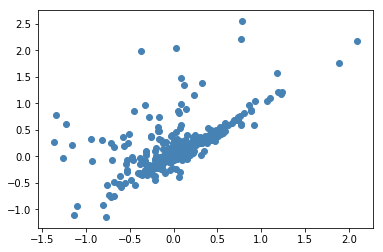

In [35]:
plt.scatter((diff_PDFMedian_m_apdata5filt),(diff_PDFMedian_m_apdata6filt), color='steelblue')

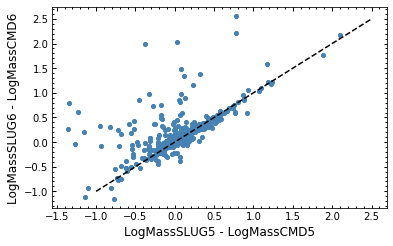

In [61]:
#Slug Masses vs CMD Masses with ONLY CMD BEST METHOD used 
x=np.arange(-1,2.6,0.5)
ax=plt.subplot()
#plt.subplot(1,2,1)
plt.scatter((diff_PDFMedian_m_apdata5filt),(diff_PDFMedian_m_apdata6filt), color='steelblue',s=17)
plt.plot(x,x,'k--')
ax.tick_params(which='both', direction='in',width=1)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.plot(x,np.median(diff_PDFMedian_m_apdata)*np.ones(6),'k--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_25q*np.ones(6),'b--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_75q*np.ones(6),'r--',lw=2)
plt.ylabel('LogMassSLUG6 - LogMassCMD6', fontsize=12)
plt.xlabel('LogMassSLUG5 - LogMassCMD5', fontsize=12);


#plt.subplot(1,2,2)
#a=np.arange(0,180,1)
#plt.hist(diff_PDFMedian_m_apdata, orientation='horizontal',histtype='step',lw=2,color='steelblue')
#plt.plot(a,np.median(diff_PDFMedian_m_apdata)*np.ones(180),'k--',lw=2,label='Median')
#plt.plot(a,diff_PDFMedian_m_apdata_25q*np.ones(180),'b--',lw=2,label='25th percentile')
#plt.plot(a,diff_PDFMedian_m_apdata_75q*np.ones(180),'r--',lw=2,label='75th percentile')
#plt.xlabel('Clusters',fontsize=13)
#plt.yticks([])


plt.subplots_adjust(hspace=0.4, wspace=0, bottom=0.5, top=1.2, right=0.9)
plt.savefig('/Volumes/My_Passport_for_Mac/M33_M31_LGCS_Files/M31-Andromeda/Model_Comparison_Files/SlugPDF-CMDMassEst5filt_vs_SlugPDF-CMDMassEst6filt.pdf')

In [48]:
sorted_tPDF_apdata5Median=np.sort(diff_PDFMedian_t_apdata5filt)
diff_PDFMedian_t_apdata5_25q=np.median(sorted_tPDF_apdata5Median[0:179])
diff_PDFMedian_t_apdata5_75q=np.median(sorted_tPDF_apdata5Median[180:358])

In [49]:
sorted_tPDF_apdata6Median=np.sort(diff_PDFMedian_t_apdata6filt)
diff_PDFMedian_t_apdata6_25q=np.median(sorted_tPDF_apdata6Median[0:179])
diff_PDFMedian_t_apdata6_75q=np.median(sorted_tPDF_apdata6Median[180:358])

In [50]:
#IQR for Age PDF Median - apdata 5 FILTERS 
diff_PDFMedian_t_apdata5_75q-diff_PDFMedian_t_apdata5_25q

0.6811017185728261

In [51]:
#IQR for Age PDF Median - apdata 6 FILTERS
diff_PDFMedian_t_apdata6_75q-diff_PDFMedian_t_apdata6_25q

0.6696847911711457

In [52]:
diff_PDFMedian_t_apdata5_25q,np.median(diff_PDFMedian_t_apdata5filt),diff_PDFMedian_t_apdata5_75q

(-0.35905489980382477, 9.359791874885559e-08, 0.3220468187690013)

In [53]:
diff_PDFMedian_t_apdata6_25q,np.median(diff_PDFMedian_t_apdata6filt),diff_PDFMedian_t_apdata6_75q

(-0.20629910329048773, 0.14724408315978632, 0.4633856878806579)

In [54]:
#standard deviation (sigma) of Age median of the PDF - Age apdata
np.std(diff_PDFMedian_t_apdata5filt),np.std(diff_PDFMedian_t_apdata6filt)

(0.6215743689425293, 0.6236141347841173)

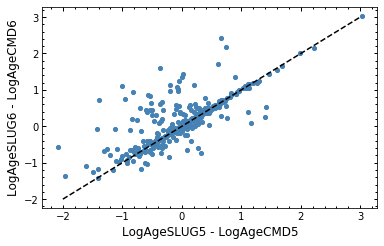

In [62]:
#Slug Masses vs CMD Masses with ONLY CMD BEST METHOD used 
x=np.arange(-2,3.1,0.5)
ax=plt.subplot()
#plt.subplot(1,2,1)
plt.scatter((diff_PDFMedian_t_apdata5filt),(diff_PDFMedian_t_apdata6filt), color='steelblue',s=17)
plt.plot(x,x,'k--')
ax.tick_params(which='both', direction='in',width=1)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.plot(x,np.median(diff_PDFMedian_m_apdata)*np.ones(6),'k--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_25q*np.ones(6),'b--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_75q*np.ones(6),'r--',lw=2)
plt.ylabel('LogAgeSLUG6 - LogAgeCMD6', fontsize=12)
plt.xlabel('LogAgeSLUG5 - LogAgeCMD5', fontsize=12);


#plt.subplot(1,2,2)
#a=np.arange(0,180,1)
#plt.hist(diff_PDFMedian_m_apdata, orientation='horizontal',histtype='step',lw=2,color='steelblue')
#plt.plot(a,np.median(diff_PDFMedian_m_apdata)*np.ones(180),'k--',lw=2,label='Median')
#plt.plot(a,diff_PDFMedian_m_apdata_25q*np.ones(180),'b--',lw=2,label='25th percentile')
#plt.plot(a,diff_PDFMedian_m_apdata_75q*np.ones(180),'r--',lw=2,label='75th percentile')
#plt.xlabel('Clusters',fontsize=13)
#plt.yticks([])


plt.subplots_adjust(hspace=0.4, wspace=0, bottom=0.5, top=1.2, right=0.9)
#plt.savefig('/Volumes/My_Passport_for_Mac/M33_M31_LGCS_Files/M31-Andromeda/Model_Comparison_Files/SlugPDF-CMDAgeEst5filt_vs_SlugPDF-CMDAgeEst6filt.pdf')

In [63]:
#PERCENTILES FOR EXTINCTION differences for clusters with CMD best method
sorted_xPDF_apdata5Median=np.sort(diff_PDFMedian_x_apdata5filt)
diff_PDFMedian_x_apdata5_25q=np.median(sorted_xPDF_apdata5Median[0:179])
diff_PDFMedian_x_apdata5_75q=np.median(sorted_xPDF_apdata5Median[180:358])


In [64]:
#PERCENTILES FOR EXTINCTION differences for clusters with CMD best method
sorted_xPDF_apdata6Median=np.sort(diff_PDFMedian_x_apdata6filt)
diff_PDFMedian_x_apdata6_25q=np.median(sorted_xPDF_apdata6Median[0:179])
diff_PDFMedian_x_apdata6_75q=np.median(sorted_xPDF_apdata6Median[180:358])


In [65]:
diff_PDFMedian_x_apdata5_25q, np.median(diff_PDFMedian_x_apdata5filt),diff_PDFMedian_x_apdata5_75q

(-0.35238500136744055, -0.00870898903950601, 0.44157848932930627)

In [66]:
diff_PDFMedian_x_apdata6_25q, np.median(diff_PDFMedian_x_apdata6filt),diff_PDFMedian_x_apdata6_75q

(-0.405834419928105, -0.05842154047301612, 0.39129104672328086)

In [67]:
#IQR for Extinction PDF Median - apdata 5 filters
diff_PDFMedian_x_apdata5_75q-diff_PDFMedian_x_apdata5_25q

0.7939634906967468

#IQR for Extinction PDF Median - apdata 6 filters
diff_PDFMedian_x_apdata6_75q-diff_PDFMedian_x_apdata6_25q

In [69]:
#standard deviation (sigma) of Extinction median of the PDF - Extinction apdata
np.std(diff_PDFMedian_x_apdata5filt),np.std(diff_PDFMedian_x_apdata6filt)

(2.3389595133296637, 2.66527014273898)

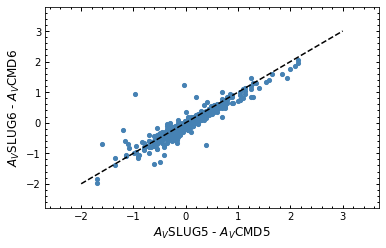

In [73]:
#Slug Masses vs CMD Masses with ONLY CMD BEST METHOD used 
x=np.arange(-2,3.1,0.5)
ax=plt.subplot()
#plt.subplot(1,2,1)
plt.scatter((diff_PDFMedian_x_apdata5filt),(diff_PDFMedian_x_apdata6filt), color='steelblue',s=17)
plt.plot(x,x,'k--')
ax.tick_params(which='both', direction='in',width=1)
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
#plt.plot(x,np.median(diff_PDFMedian_m_apdata)*np.ones(6),'k--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_25q*np.ones(6),'b--',lw=2)
#plt.plot(x,diff_PDFMedian_m_apdata_75q*np.ones(6),'r--',lw=2)
plt.ylabel('$A_V$SLUG6 - $A_V$CMD6', fontsize=12)
plt.xlabel('$A_V$SLUG5 - $A_V$CMD5', fontsize=12)
plt.xlim(-2.7,3.7)
plt.ylim(-2.8,3.8);


#plt.subplot(1,2,2)
#a=np.arange(0,180,1)
#plt.hist(diff_PDFMedian_m_apdata, orientation='horizontal',histtype='step',lw=2,color='steelblue')
#plt.plot(a,np.median(diff_PDFMedian_m_apdata)*np.ones(180),'k--',lw=2,label='Median')
#plt.plot(a,diff_PDFMedian_m_apdata_25q*np.ones(180),'b--',lw=2,label='25th percentile')
#plt.plot(a,diff_PDFMedian_m_apdata_75q*np.ones(180),'r--',lw=2,label='75th percentile')
#plt.xlabel('Clusters',fontsize=13)
#plt.yticks([])


plt.subplots_adjust(hspace=0.4, wspace=0, bottom=0.5, top=1.2, right=0.9)
#plt.savefig('/Volumes/My_Passport_for_Mac/M33_M31_LGCS_Files/M31-Andromeda/Model_Comparison_Files/SlugPDF-CMDAgeEst5filt_vs_SlugPDF-CMDAgeEst6filt.pdf')